In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
import time as timer
from sklearn.inspection import permutation_importance

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset

data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
data.isnull().sum()/len(data)*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [8]:
# Since the null value percentage is too low, we can drop the records.

data['bmi'].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [10]:
data = data[~np.isnan(data['bmi'])]

In [11]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [13]:
data['smoking_status'].value_counts()

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

In [14]:
len(data[data['smoking_status'] == 'Unknown']) / len(data) * 100

30.209818700346304

Since the null values are already categorized as 'Unknown', we will keep it as such and proceed.

In [15]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [16]:
data['work_type'].value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [17]:
data['Residence_type'].value_counts()

Urban    2490
Rural    2419
Name: Residence_type, dtype: int64

In [18]:
data['ever_married'].value_counts()

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [19]:
data['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [20]:
# Since there is only one value with Gender other, we can drop it. 
# Because this will lead to creating one extra variable during model building.

data = data[-(data['gender'] == 'Other')]

In [21]:
data['gender'].value_counts()

Female    2897
Male      2011
Name: gender, dtype: int64

In [22]:
data['stroke'].value_counts()

0    4699
1     209
Name: stroke, dtype: int64

In [23]:
data['hypertension'].value_counts()

0    4457
1     451
Name: hypertension, dtype: int64

In [24]:
data['age'].describe()

count    4908.000000
mean       42.868810
std        22.556128
min         0.080000
25%        25.000000
50%        44.000000
75%        60.000000
max        82.000000
Name: age, dtype: float64

In [25]:
data.age.loc[(data.age > 100)]

Series([], Name: age, dtype: float64)

In [26]:
data.age.loc[(data.age < 0)].count()

0

In [27]:
data.age.loc[(data.age > 80)].count()

115

In [28]:
data.age.loc[(data.age > 90)].count()

0

In [29]:
data.age.loc[(data.age < 10) & (data.stroke == 1)].count()

0

In [31]:
import seaborn as sns

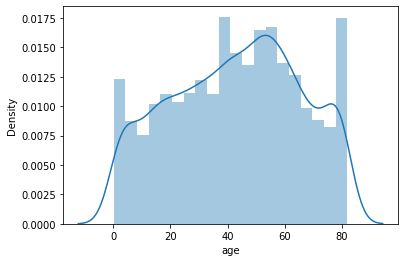

In [32]:
sns.distplot(data.age)
plt.show()

In [33]:
bins = [0, 20, 40, 60, 80, 1000]
labels = ['0-20', '20-40', '40-60', '60-80', '80+']
data['AgeGroup'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

In [34]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60-80
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,80+
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-60
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60-80
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,80+


In [35]:
data['AgeGroup'].value_counts()

40-60    1510
20-40    1169
60-80    1103
0-20      944
80+       182
Name: AgeGroup, dtype: int64

In [36]:
data.drop('age', axis=1, inplace=True)

In [37]:
data.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup
0,9046,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60-80
2,31112,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,80+
3,60182,Female,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-60
4,1665,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60-80
5,56669,Male,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,80+


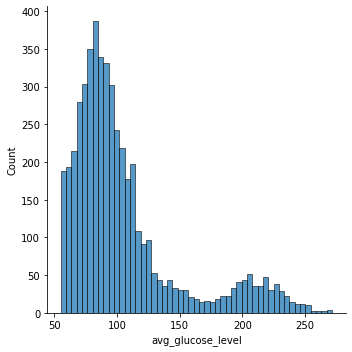

In [38]:
sns.displot(data.avg_glucose_level)
plt.show()

In [39]:
data.avg_glucose_level.describe()

count    4908.000000
mean      105.297402
std        44.425550
min        55.120000
25%        77.067500
50%        91.680000
75%       113.495000
max       271.740000
Name: avg_glucose_level, dtype: float64

As we can see, the minimum blood sugar level is around 55 which is completely normal. Hence we will create category accordingly

In [40]:
bins = [0, 100, 150, 200, 250, 1000]
labels = ['< 100', '100-150', '150-200', '200-250', '250+']
data['GlucoseLevelRange'] = pd.cut(data['avg_glucose_level'], bins=bins, labels=labels, right=False)

In [41]:
data.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,AgeGroup,GlucoseLevelRange
0,9046,Male,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60-80,200-250
2,31112,Male,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,80+,100-150
3,60182,Female,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-60,150-200
4,1665,Female,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60-80,150-200
5,56669,Male,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,80+,150-200


In [42]:
data.GlucoseLevelRange.value_counts()

< 100      3030
100-150    1212
200-250     368
150-200     275
250+         23
Name: GlucoseLevelRange, dtype: int64

In [43]:
data.drop('avg_glucose_level', axis=1, inplace=True)

In [44]:
data.head()

,id,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,AgeGroup,GlucoseLevelRange
0,9046,Male,0,1,Yes,Private,Urban,36.6,formerly smoked,1,60-80,200-250
2,31112,Male,0,1,Yes,Private,Rural,32.5,never smoked,1,80+,100-150
3,60182,Female,0,0,Yes,Private,Urban,34.4,smokes,1,40-60,150-200
4,1665,Female,1,0,Yes,Self-employed,Rural,24.0,never smoked,1,60-80,150-200
5,56669,Male,0,0,Yes,Private,Urban,29.0,formerly smoked,1,80+,150-200


In [45]:
# We can drop the id column as it will be of no use.

data.drop('id', axis=1, inplace=True)

In [46]:
data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,bmi,smoking_status,stroke,AgeGroup,GlucoseLevelRange
0,Male,0,1,Yes,Private,Urban,36.6,formerly smoked,1,60-80,200-250
2,Male,0,1,Yes,Private,Rural,32.5,never smoked,1,80+,100-150
3,Female,0,0,Yes,Private,Urban,34.4,smokes,1,40-60,150-200
4,Female,1,0,Yes,Self-employed,Rural,24.0,never smoked,1,60-80,150-200
5,Male,0,0,Yes,Private,Urban,29.0,formerly smoked,1,80+,150-200


In [47]:
# Handling bmi:

data['bmi'].describe()

count    4908.00000
mean       28.89456
std         7.85432
min        10.30000
25%        23.50000
50%        28.10000
75%        33.10000
max        97.60000
Name: bmi, dtype: float64

According to https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmi_tbl.pdf, BMI is divided into 4 categories.

Let's check our value ranges

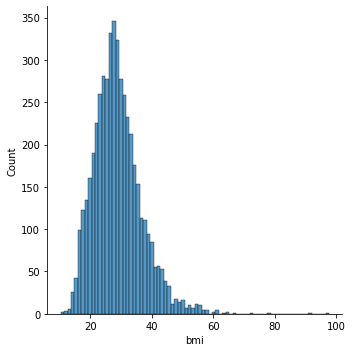

In [48]:
sns.displot(data.bmi)
plt.show()

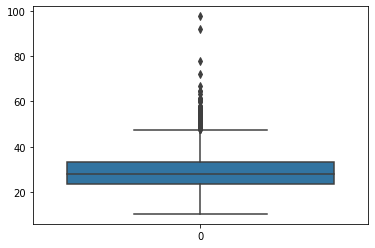

In [49]:
sns.boxplot(data.bmi)
plt.show()

In [50]:
len(data[data['bmi'] > 65])

5

It is clearly seen that few values are crossing the general range.
But according to sources our maximum BMI value present(97.6) is a possible one. Hence we won't remove the values.

In [53]:
bins = [0, 19, 25, 30, 40, 1000]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'ExtObese']
data['BMIGroup'] = pd.cut(data['bmi'], bins=bins, labels=labels, right=False)

In [54]:
data.drop('bmi', axis=1, inplace=True)

In [55]:
data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,AgeGroup,GlucoseLevelRange,BMIGroup
0,Male,0,1,Yes,Private,Urban,formerly smoked,1,60-80,200-250,Obese
2,Male,0,1,Yes,Private,Rural,never smoked,1,80+,100-150,Obese
3,Female,0,0,Yes,Private,Urban,smokes,1,40-60,150-200,Obese
4,Female,1,0,Yes,Self-employed,Rural,never smoked,1,60-80,150-200,Normal
5,Male,0,0,Yes,Private,Urban,formerly smoked,1,80+,150-200,Overweight


Since our dataset is cleaned, we can proceed with preparing the data.

Data Preparation:

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   gender             4908 non-null   object  
 1   hypertension       4908 non-null   int64   
 2   heart_disease      4908 non-null   int64   
 3   ever_married       4908 non-null   object  
 4   work_type          4908 non-null   object  
 5   Residence_type     4908 non-null   object  
 6   smoking_status     4908 non-null   object  
 7   stroke             4908 non-null   int64   
 8   AgeGroup           4908 non-null   category
 9   GlucoseLevelRange  4908 non-null   category
 10  BMIGroup           4908 non-null   category
dtypes: category(3), int64(3), object(5)
memory usage: 489.1+ KB


In [57]:
# Define a dictionary mapping the values to their binary equivalent
binary_map = {'Yes': 1, 'No': 0}

# Apply the map function to the specified variable(s) using the dictionary
data['ever_married'] = data['ever_married'].map(binary_map)


In [58]:
data.tail()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,AgeGroup,GlucoseLevelRange,BMIGroup
5104,Female,0,0,0,children,Rural,Unknown,0,0-20,100-150,Underweight
5106,Female,0,0,1,Self-employed,Urban,never smoked,0,80+,100-150,ExtObese
5107,Female,0,0,1,Self-employed,Rural,never smoked,0,20-40,< 100,Obese
5108,Male,0,0,1,Private,Rural,formerly smoked,0,40-60,150-200,Overweight
5109,Female,0,0,1,Govt_job,Urban,Unknown,0,40-60,< 100,Overweight


In [59]:
dummy1 = pd.get_dummies(data[['gender', 'work_type', 'Residence_type', 'smoking_status', 'AgeGroup', 'GlucoseLevelRange', 'BMIGroup']], drop_first=True)


In [60]:
dummy1.head()

,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,AgeGroup_20-40,...,AgeGroup_60-80,AgeGroup_80+,GlucoseLevelRange_100-150,GlucoseLevelRange_150-200,GlucoseLevelRange_200-250,GlucoseLevelRange_250+,BMIGroup_Normal,BMIGroup_Overweight,BMIGroup_Obese,BMIGroup_ExtObese
0,1,0,1,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,1,0,1,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
5,1,0,1,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [61]:
data = pd.concat([data, dummy1], axis=1)

In [63]:
data.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,AgeGroup,GlucoseLevelRange,...,AgeGroup_60-80,AgeGroup_80+,GlucoseLevelRange_100-150,GlucoseLevelRange_150-200,GlucoseLevelRange_200-250,GlucoseLevelRange_250+,BMIGroup_Normal,BMIGroup_Overweight,BMIGroup_Obese,BMIGroup_ExtObese
0,Male,0,1,1,Private,Urban,formerly smoked,1,60-80,200-250,...,1,0,0,0,1,0,0,0,1,0
2,Male,0,1,1,Private,Rural,never smoked,1,80+,100-150,...,0,1,1,0,0,0,0,0,1,0
3,Female,0,0,1,Private,Urban,smokes,1,40-60,150-200,...,0,0,0,1,0,0,0,0,1,0
4,Female,1,0,1,Self-employed,Rural,never smoked,1,60-80,150-200,...,1,0,0,1,0,0,1,0,0,0
5,Male,0,0,1,Private,Urban,formerly smoked,1,80+,150-200,...,0,1,0,1,0,0,0,1,0,0


In [64]:
strokedf = data.copy()

In [65]:
strokedf = strokedf.drop(['gender', 'work_type', 'Residence_type', 'smoking_status', 'AgeGroup', 'GlucoseLevelRange', 'BMIGroup'], axis=1)


In [66]:
strokedf.head()

,hypertension,heart_disease,ever_married,stroke,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,...,AgeGroup_60-80,AgeGroup_80+,GlucoseLevelRange_100-150,GlucoseLevelRange_150-200,GlucoseLevelRange_200-250,GlucoseLevelRange_250+,BMIGroup_Normal,BMIGroup_Overweight,BMIGroup_Obese,BMIGroup_ExtObese
0,0,1,1,1,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,1,1,1,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,0,0,1,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,1,0,1,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
5,0,0,1,1,1,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [67]:
strokedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   hypertension                    4908 non-null   int64
 1   heart_disease                   4908 non-null   int64
 2   ever_married                    4908 non-null   int64
 3   stroke                          4908 non-null   int64
 4   gender_Male                     4908 non-null   uint8
 5   work_type_Never_worked          4908 non-null   uint8
 6   work_type_Private               4908 non-null   uint8
 7   work_type_Self-employed         4908 non-null   uint8
 8   work_type_children              4908 non-null   uint8
 9   Residence_type_Urban            4908 non-null   uint8
 10  smoking_status_formerly smoked  4908 non-null   uint8
 11  smoking_status_never smoked     4908 non-null   uint8
 12  smoking_status_smokes           4908 non-null   uint8
 13  Age

In [68]:
strokedf.isnull().sum()

hypertension                      0
heart_disease                     0
ever_married                      0
stroke                            0
gender_Male                       0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
AgeGroup_20-40                    0
AgeGroup_40-60                    0
AgeGroup_60-80                    0
AgeGroup_80+                      0
GlucoseLevelRange_100-150         0
GlucoseLevelRange_150-200         0
GlucoseLevelRange_200-250         0
GlucoseLevelRange_250+            0
BMIGroup_Normal                   0
BMIGroup_Overweight               0
BMIGroup_Obese                    0
BMIGroup_ExtObese                 0
dtype: int64

Test-Train-Split:

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
# Assigning all the feature variables to X:
X = strokedf.drop(['stroke'], axis=1)

In [71]:
# Assigning the target variable to y:
y = strokedf['stroke']

In [72]:
X.head()

,hypertension,heart_disease,ever_married,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,...,AgeGroup_60-80,AgeGroup_80+,GlucoseLevelRange_100-150,GlucoseLevelRange_150-200,GlucoseLevelRange_200-250,GlucoseLevelRange_250+,BMIGroup_Normal,BMIGroup_Overweight,BMIGroup_Obese,BMIGroup_ExtObese
0,0,1,1,1,0,1,0,0,1,1,...,1,0,0,0,1,0,0,0,1,0
2,0,1,1,1,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
5,0,0,1,1,0,1,0,0,1,1,...,0,1,0,1,0,0,0,1,0,0


In [74]:
y.head()

0    1
2    1
3    1
4    1
5    1
Name: stroke, dtype: int64

In [75]:
# Splitting data into Test & Train set:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

Since we dont have any continuous variables, we can skip the feature scaling part.

In [76]:
stroke = (sum(strokedf['stroke'])/len(strokedf['stroke'].index))*100
stroke

4.258353708231459

We have a 4.3% Stroke rate

In [77]:
strokedf.stroke.value_counts()

0    4699
1     209
Name: stroke, dtype: int64

In [78]:
# We can reduce the non-stroke sample number to balance the ratio:

shuffled_data = strokedf.sample(random_state=4)
stroke_yes = strokedf.loc[strokedf['stroke'] == 1]
stroke_no = strokedf.loc[strokedf['stroke'] == 0].sample(n= 1500,random_state= 101)

norm_strokedf = pd.concat([stroke_yes, stroke_no])

In [82]:
norm_strokedf.head()

,hypertension,heart_disease,ever_married,stroke,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,...,AgeGroup_60-80,AgeGroup_80+,GlucoseLevelRange_100-150,GlucoseLevelRange_150-200,GlucoseLevelRange_200-250,GlucoseLevelRange_250+,BMIGroup_Normal,BMIGroup_Overweight,BMIGroup_Obese,BMIGroup_ExtObese
0,0,1,1,1,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,1,1,1,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,0,0,1,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,1,0,1,1,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
5,0,0,1,1,1,0,1,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [80]:
stroke1 = (sum(norm_strokedf['stroke'])/len(norm_strokedf['stroke'].index))*100
stroke1

12.229373902867174

Text(0.5, 1.0, 'Stroke Analysis')

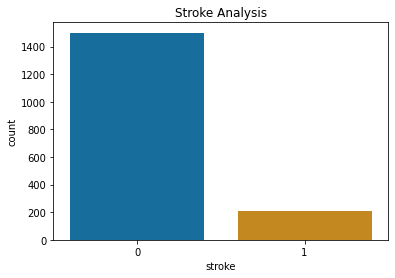

In [86]:
sns.countplot(x='stroke', data=norm_strokedf, palette='colorblind')
plt.title('Stroke Analysis')

Let's see the correlation:

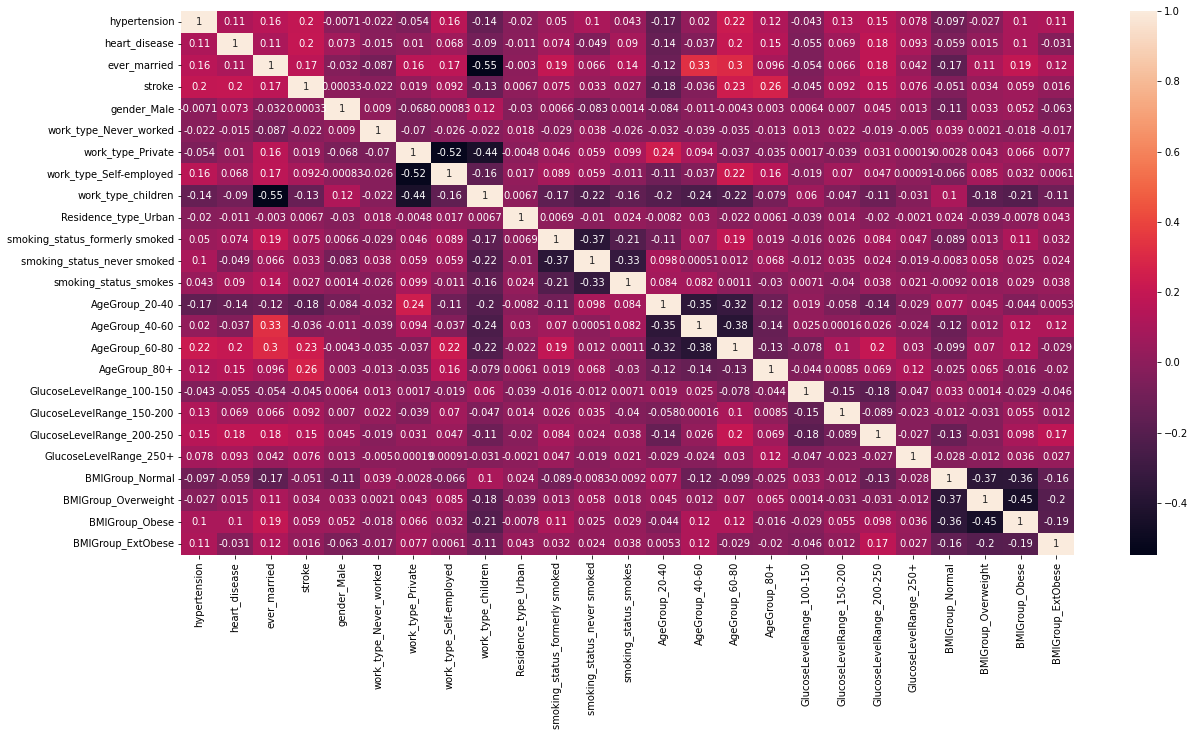

In [87]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(norm_strokedf.corr(),annot = True)
plt.show()

In [88]:
norm_strokedf.columns

Index(['hypertension', 'heart_disease', 'ever_married', 'stroke',
       'gender_Male', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes', 'AgeGroup_20-40', 'AgeGroup_40-60',
       'AgeGroup_60-80', 'AgeGroup_80+', 'GlucoseLevelRange_100-150',
       'GlucoseLevelRange_150-200', 'GlucoseLevelRange_200-250',
       'GlucoseLevelRange_250+', 'BMIGroup_Normal', 'BMIGroup_Overweight',
       'BMIGroup_Obese', 'BMIGroup_ExtObese'],
      dtype='object')

In [90]:
# Lets remove some highly correlated variables:

X_test = X_test.drop(['work_type_children','work_type_Private','BMIGroup_Overweight', 'BMIGroup_Normal', 'AgeGroup_20-40', 'smoking_status_never smoked'], axis=1)
X_train = X_train.drop(['work_type_children','work_type_Private','BMIGroup_Overweight', 'BMIGroup_Normal', 'AgeGroup_20-40', 'smoking_status_never smoked'], axis=1)

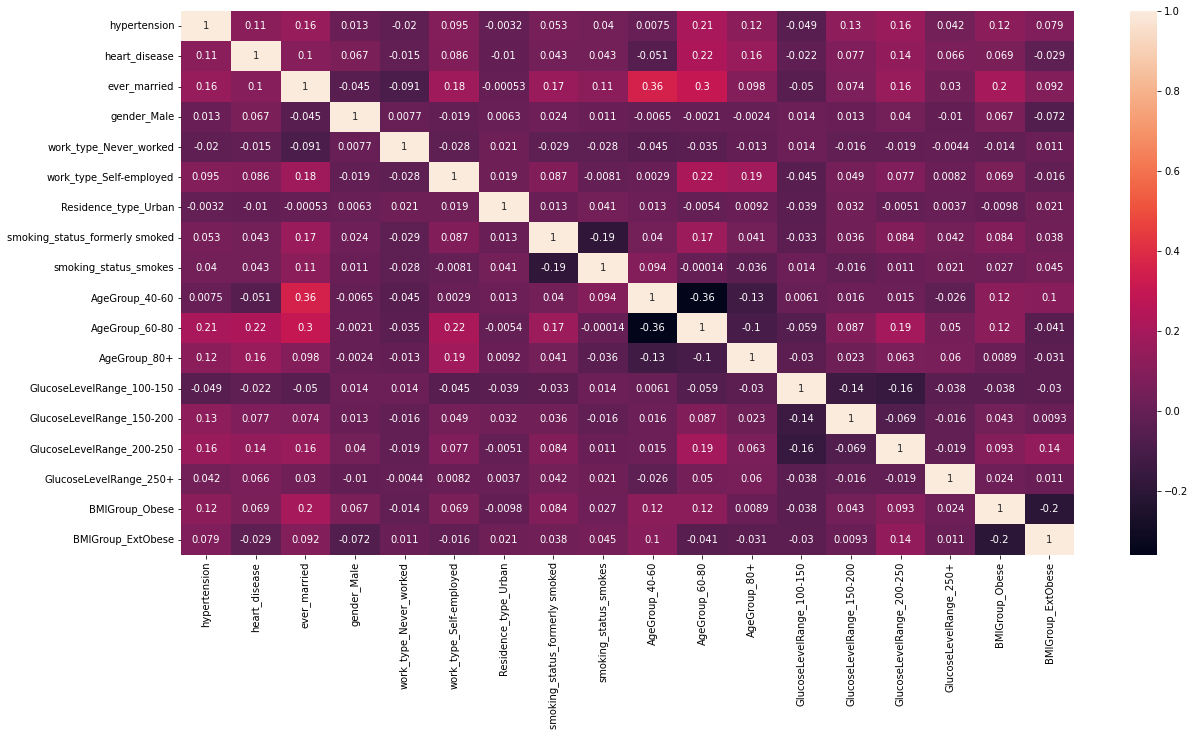

In [91]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

MODEL BUILDING:

Logistic Regression

In [92]:
import statsmodels.api as sm

# Fit logistic regression model
X_train_const = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_const)
logit_result = logit_model.fit()

# Print summary of the model
print(logit_result.summary())


         Current function value: 0.144558
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 3435
Model:                          Logit   Df Residuals:                     3416
Method:                           MLE   Df Model:                           18
Date:                Fri, 24 Mar 2023   Pseudo R-squ.:                  0.1903
Time:                        21:00:34   Log-Likelihood:                -496.56
converged:                      False   LL-Null:                       -613.26
Covariance Type:            nonrobust   LLR p-value:                 1.905e-39
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -6.0773      0.534    -11.371      0.000      -7.125      -5.030
hyper

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Feature Selection using RFE:

In [93]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [100]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a logistic regression model
logreg = LogisticRegression()

# create the RFE model and select 10 attributes
rfe = RFE(estimator=logreg, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True False False False False  True False  True  True  True
 False  True  True  True False False]
[1 1 1 6 5 9 2 1 7 1 1 1 3 1 1 1 8 4]


In [101]:
rfe.support_

array([ True,  True,  True, False, False, False, False,  True, False,
        True,  True,  True, False,  True,  True,  True, False, False])

In [102]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('hypertension', True, 1),
 ('heart_disease', True, 1),
 ('ever_married', True, 1),
 ('gender_Male', False, 6),
 ('work_type_Never_worked', False, 5),
 ('work_type_Self-employed', False, 9),
 ('Residence_type_Urban', False, 2),
 ('smoking_status_formerly smoked', True, 1),
 ('smoking_status_smokes', False, 7),
 ('AgeGroup_40-60', True, 1),
 ('AgeGroup_60-80', True, 1),
 ('AgeGroup_80+', True, 1),
 ('GlucoseLevelRange_100-150', False, 3),
 ('GlucoseLevelRange_150-200', True, 1),
 ('GlucoseLevelRange_200-250', True, 1),
 ('GlucoseLevelRange_250+', True, 1),
 ('BMIGroup_Obese', False, 8),
 ('BMIGroup_ExtObese', False, 4)]

In [103]:
col = X_train.columns[rfe.support_]

In [104]:
X_train.columns[~rfe.support_]

Index(['gender_Male', 'work_type_Never_worked', 'work_type_Self-employed',
       'Residence_type_Urban', 'smoking_status_smokes',
       'GlucoseLevelRange_100-150', 'BMIGroup_Obese', 'BMIGroup_ExtObese'],
      dtype='object')

In [105]:
X_train_sm = sm.add_constant(X_train[col])
logmod2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3435
Model:                            GLM   Df Residuals:                     3424
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -497.93
Date:                Fri, 24 Mar 2023   Deviance:                       995.87
Time:                        21:03:58   Pearson chi2:                 3.19e+03
No. Iterations:                     9   Pseudo R-squ. (CS):            0.06494
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -6.0026      0.512    -11.726      0.000      -7.006      -4.999
hypertension                       0.5361      0.210      2.552      0.011       0.124       0.948
heart_disease                      0.5982      0.238      2.508      0.012       0.131       1.066
ever_married                       0.0357      0.308      0.116      0.908      -0.568       0.639
smoking_status_formerly smoked     0.2394      0.198      1.212      0.226      -0.148       0.627
AgeGroup_40-60                     2.4694      0.556      4.440      0.000       1.379       3.560
AgeGroup_60-80                     3.2485      0.555      5.855      0.000       2.161       4.336
AgeGroup_80+                       4.0793      0.587      6.946      0.000       2.928       5.230
GlucoseLevelRange_150-200          0.6091      0.281      2.166      0.030       0.058       1.160
GlucoseLevelRange_200-250          0.7125      0.227      3.142      0.002       0.268       1.157
GlucoseLevelRange_250+             1.3135      0.637      2.062      0.039       0.065       2.562
==================================================================================================
"""

In [106]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1914    0.029382
4378    0.002466
543     0.029382
4986    0.100937
4885    0.002556
1401    0.029382
4444    0.002556
1704    0.005016
1659    0.108198
2487    0.061897
dtype: float64

In [107]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02938204, 0.00246621, 0.02938204, 0.10093743, 0.00255554,
       0.02938204, 0.00255554, 0.00501582, 0.10819769, 0.06189658])

Creating a dataframe with the actual stroke flag and the predicted probabilities

In [108]:
y_train_pred_final = pd.DataFrame({'Stroke':y_train.values, 'Stroke_Prob':y_train_pred})
y_train_pred_final['pID'] = y_train.index
y_train_pred_final.head()

,Stroke,Stroke_Prob,pID
0,0,0.029382,1914
1,0,0.002466,4378
2,0,0.029382,543
3,0,0.100937,4986
4,0,0.002556,4885


Creating new column 'predicted' with 1 if Stroke_Prob > 0.3 else 0

In [110]:
y_train_pred_final['predicted'] = y_train_pred_final.Stroke_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

,Stroke,Stroke_Prob,pID,predicted
0,0,0.029382,1914,0
1,0,0.002466,4378,0
2,0,0.029382,543,0
3,0,0.100937,4986,0
4,0,0.002556,4885,0


In [111]:
from sklearn import metrics

In [114]:
from sklearn import metrics

# Calculate overall accuracy
accuracy = metrics.accuracy_score(y_train_pred_final.Stroke, y_train_pred_final.predicted)
print("Overall Accuracy:", accuracy)

# Print confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Stroke, y_train_pred_final.predicted)
print("Confusion Matrix:")
print(confusion)


Overall Accuracy: 0.9502183406113537
Confusion Matrix:
[[3257   29]
 [ 142    7]]


Checking VIFs

In [115]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [116]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to store the VIF values for each feature variable
vif = pd.DataFrame({'Features': X_train.columns})

# Calculate the VIF values for each feature variable
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Round the VIF values to 2 decimal places
vif['VIF'] = vif['VIF'].round(2)

# Sort the DataFrame by decreasing VIF values
vif = vif.sort_values(by='VIF', ascending=False)

# Print the resulting DataFrame
print(vif)


                          Features   VIF
2                     ever_married  4.31
9                   AgeGroup_40-60  2.58
10                  AgeGroup_60-80  2.49
6             Residence_type_Urban  1.67
16                  BMIGroup_Obese  1.59
3                      gender_Male  1.51
5          work_type_Self-employed  1.33
7   smoking_status_formerly smoked  1.32
11                    AgeGroup_80+  1.31
12       GlucoseLevelRange_100-150  1.27
8            smoking_status_smokes  1.26
14       GlucoseLevelRange_200-250  1.25
0                     hypertension  1.23
17               BMIGroup_ExtObese  1.21
1                    heart_disease  1.18
13       GlucoseLevelRange_150-200  1.12
15          GlucoseLevelRange_250+  1.02
4           work_type_Never_worked  1.01


In [117]:
# Dropping variable with high p-value:

col = col.drop('ever_married', 1)
col

Index(['hypertension', 'heart_disease', 'smoking_status_formerly smoked',
       'AgeGroup_40-60', 'AgeGroup_60-80', 'AgeGroup_80+',
       'GlucoseLevelRange_150-200', 'GlucoseLevelRange_200-250',
       'GlucoseLevelRange_250+'],
      dtype='object')

In [118]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logmod3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3435
Model:                            GLM   Df Residuals:                     3425
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -497.94
Date:                Fri, 24 Mar 2023   Deviance:                       995.88
Time:                        21:10:59   Pearson chi2:                 3.20e+03
No. Iterations:                     9   Pseudo R-squ. (CS):            0.06494
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -5.9908      0.501    -11.948      0.000      -6.974      -5.008
hypertension                       0.5358      0.210      2.551      0.011       0.124       0.947
heart_disease                      0.5960      0.238      2.507      0.012       0.130       1.062
smoking_status_formerly smoked     0.2405      0.197      1.218      0.223      -0.146       0.627
AgeGroup_40-60                     2.4898      0.528      4.718      0.000       1.455       3.524
AgeGroup_60-80                     3.2695      0.525      6.231      0.000       2.241       4.298
AgeGroup_80+                       4.0999      0.560      7.321      0.000       3.002       5.198
GlucoseLevelRange_150-200          0.6090      0.281      2.165      0.030       0.058       1.160
GlucoseLevelRange_200-250          0.7136      0.227      3.150      0.002       0.270       1.158
GlucoseLevelRange_250+             1.3147      0.637      2.065      0.039       0.067       2.563
==================================================================================================
"""

In [119]:
# Dropping variable with high p-value:

col = col.drop('smoking_status_formerly smoked', 1)
col

Index(['hypertension', 'heart_disease', 'AgeGroup_40-60', 'AgeGroup_60-80',
       'AgeGroup_80+', 'GlucoseLevelRange_150-200',
       'GlucoseLevelRange_200-250', 'GlucoseLevelRange_250+'],
      dtype='object')

In [120]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logmod4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logmod4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3435
Model:                            GLM   Df Residuals:                     3426
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -498.66
Date:                Fri, 24 Mar 2023   Deviance:                       997.32
Time:                        21:11:18   Pearson chi2:                 3.27e+03
No. Iterations:                     9   Pseudo R-squ. (CS):            0.06454
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.9697      0.501    -11.915      0.000      -6.952      -4.988
hypertension                  0.5313      0.210      2.530      0.011       0.120       0.943
heart_disease                 0.5888      0.237      2.481      0.013       0.124       1.054
AgeGroup_40-60                2.5162      0.527      4.773      0.000       1.483       3.550
AgeGroup_60-80                3.3186      0.523      6.346      0.000       2.294       4.343
AgeGroup_80+                  4.1385      0.559      7.402      0.000       3.043       5.234
GlucoseLevelRange_150-200     0.6237      0.280      2.224      0.026       0.074       1.173
GlucoseLevelRange_200-250     0.7277      0.226      3.217      0.001       0.284       1.171
GlucoseLevelRange_250+        1.3339      0.638      2.092      0.036       0.084       2.584
=============================================================================================
"""

In [121]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1914    0.030665
4378    0.002548
543     0.030665
4986    0.105552
4885    0.002548
1401    0.030665
4444    0.002548
1704    0.005262
1659    0.116347
2487    0.065919
dtype: float64

In [122]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03066487, 0.00254844, 0.03066487, 0.10555197, 0.00254844,
       0.03066487, 0.00254844, 0.00526188, 0.1163474 , 0.0659186 ])

Creating a dataframe with the actual stroke flag and the predicted probabilities

In [123]:
y_train_pred_final = pd.DataFrame({'Stroke':y_train.values, 'Stroke_Prob':y_train_pred})
y_train_pred_final['pID'] = y_train.index
y_train_pred_final.head()

,Stroke,Stroke_Prob,pID
0,0,0.030665,1914
1,0,0.002548,4378
2,0,0.030665,543
3,0,0.105552,4986
4,0,0.002548,4885


Creating new column 'predicted' with 1 if Stroke_Prob > 0.3 else 0

In [124]:
y_train_pred_final['predicted'] = y_train_pred_final.Stroke_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

,Stroke,Stroke_Prob,pID,predicted
0,0,0.030665,1914,0
1,0,0.002548,4378,0
2,0,0.030665,543,0
3,0,0.105552,4986,0
4,0,0.002548,4885,0


In [125]:
from sklearn import metrics

In [126]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Stroke, y_train_pred_final.predicted )
print(confusion)

[[3254   32]
 [ 141    8]]


In [127]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Stroke, y_train_pred_final.predicted))

0.9496360989810771


Checking VIFs

In [128]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,AgeGroup_60-80,1.31
0,hypertension,1.22
6,GlucoseLevelRange_200-250,1.18
1,heart_disease,1.17
2,AgeGroup_40-60,1.09
4,AgeGroup_80+,1.09
5,GlucoseLevelRange_150-200,1.09
7,GlucoseLevelRange_250+,1.02


Sensitivity and Specificity

In [130]:
TP = confusion[1,1] # True Positive 
TN = confusion[0,0] # True Negatives
FP = confusion[0,1] # False Positives
FN = confusion[1,0] # False Negatives

In [131]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.053691275167785234

In [132]:
# Let us calculate specificity
TN / float(TN+FP)

0.9902617163724894

In [133]:
# Calculate false postive rate - predicting stroke when patient does not have stroke
print(FP/ float(TN+FP))

0.009738283627510651


In [134]:
# positive predictive value 
print (TP / float(TP+FP))

0.2


In [135]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9584683357879235


Plotting the ROC Curve

In [136]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [138]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Stroke, y_train_pred_final.Stroke_Prob, drop_intermediate = False )

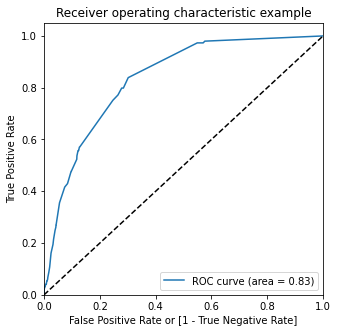

In [139]:
draw_roc(y_train_pred_final.Stroke, y_train_pred_final.Stroke_Prob)

Finding Optimal Cutoff Point


Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [140]:
# Define probability cutoffs
cutoffs = [float(x)/10 for x in range(10)]

# Create new columns with different cutoffs
for cutoff in cutoffs:
    column_name = 'Stroke_Pred_' + str(cutoff)
    y_train_pred_final[column_name] = y_train_pred_final.Stroke_Prob.map(lambda x: 1 if x > cutoff else 0)

# Display the updated dataframe
y_train_pred_final.head()


,Stroke,Stroke_Prob,pID,predicted,Stroke_Pred_0.0,Stroke_Pred_0.1,Stroke_Pred_0.2,Stroke_Pred_0.3,Stroke_Pred_0.4,Stroke_Pred_0.5,Stroke_Pred_0.6,Stroke_Pred_0.7,Stroke_Pred_0.8,Stroke_Pred_0.9
0,0,0.030665,1914,0,1,0,0,0,0,0,0,0,0,0
1,0,0.002548,4378,0,1,0,0,0,0,0,0,0,0,0
2,0,0.030665,543,0,1,0,0,0,0,0,0,0,0,0
3,0,0.105552,4986,0,1,1,0,0,0,0,0,0,0,0
4,0,0.002548,4885,0,1,0,0,0,0,0,0,0,0,0


In [142]:
cutoffs = [float(x)/10 for x in range(10)]
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])

for cutoff in cutoffs:
    y_train_pred_final['pred'] = np.where(y_train_pred_final['Stroke_Prob'] > cutoff, 1, 0)
    accuracy = metrics.accuracy_score(y_train_pred_final['Stroke'], y_train_pred_final['pred'])
    sensitivity = metrics.recall_score(y_train_pred_final['Stroke'], y_train_pred_final['pred'])
    specificity = metrics.recall_score(y_train_pred_final['Stroke'], y_train_pred_final['pred'], pos_label=0)
    cutoff_df.loc[len(cutoff_df)] = [cutoff, accuracy, sensitivity, specificity]

print(cutoff_df)


   prob  accuracy  sensitivity  specificity
0   0.0  0.043377     1.000000     0.000000
1   0.1  0.864047     0.557047     0.877967
2   0.2  0.939738     0.161074     0.975046
3   0.3  0.949636     0.053691     0.990262
4   0.4  0.956914     0.020134     0.999391
5   0.5  0.956623     0.006711     0.999696
6   0.6  0.956623     0.000000     1.000000
7   0.7  0.956623     0.000000     1.000000
8   0.8  0.956623     0.000000     1.000000
9   0.9  0.956623     0.000000     1.000000


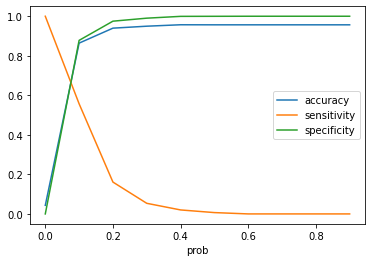

In [144]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

From the curve above, 0.8 is the optimum point to take it as a cutoff probability.

In [145]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Stroke_Prob.map( lambda x: 1 if x > 0.08 else 0)

y_train_pred_final.head()

,Stroke,Stroke_Prob,pID,predicted,Stroke_Pred_0.0,Stroke_Pred_0.1,Stroke_Pred_0.2,Stroke_Pred_0.3,Stroke_Pred_0.4,Stroke_Pred_0.5,Stroke_Pred_0.6,Stroke_Pred_0.7,Stroke_Pred_0.8,Stroke_Pred_0.9,pred,final_predicted
0,0,0.030665,1914,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0.002548,4378,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.030665,543,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.105552,4986,0,1,1,0,0,0,0,0,0,0,0,0,1
4,0,0.002548,4885,0,1,0,0,0,0,0,0,0,0,0,0,0


In [146]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Stroke, y_train_pred_final.final_predicted)

0.8593886462882097

In [147]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Stroke, y_train_pred_final.final_predicted )
confusion2

array([[2867,  419],
       [  64,   85]])

In [148]:
TP = confusion2[1,1] # True Positive 
TN = confusion2[0,0] # true Negatives
FP = confusion2[0,1] # False Positives
FN = confusion2[1,0] # False Negatives

In [149]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5704697986577181

In [150]:
# Let us calculate specificity
TN / float(TN+FP)

0.8724893487522825

In [151]:
# Calculate false postive rate - predicting stroke when patient does not have stroke
print(FP/ float(TN+FP))

0.1275106512477176


In [152]:
# Positive predictive value 
print (TP / float(TP+FP))

0.16865079365079366


In [153]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9781644489935176


We will also check the Precision-Recall for our model and make final call on which method to go with

Precision and Recall

In [154]:
confusion = metrics.confusion_matrix(y_train_pred_final.Stroke, y_train_pred_final.predicted )
confusion


array([[3254,   32],
       [ 141,    8]])

Precision
TP / TP + FP

In [155]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.2

Recall
TP / TP + FN

In [156]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.053691275167785234

Using sklearn metrics

In [157]:
from sklearn.metrics import precision_score, recall_score

In [158]:
precision_score(y_train_pred_final.Stroke, y_train_pred_final.predicted)

0.2

In [159]:
recall_score(y_train_pred_final.Stroke, y_train_pred_final.predicted)

0.053691275167785234

Precision and Recall tradeoff

In [160]:
from sklearn.metrics import precision_recall_curve

In [161]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Stroke, y_train_pred_final.Stroke_Prob)

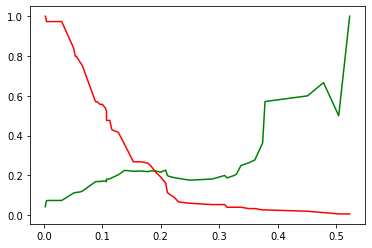

In [162]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making predictions on the Test set

In [163]:
X_test = X_test[col]
X_test.head()

,hypertension,heart_disease,AgeGroup_40-60,AgeGroup_60-80,AgeGroup_80+,GlucoseLevelRange_150-200,GlucoseLevelRange_200-250,GlucoseLevelRange_250+
2083,1,0,0,0,0,0,0,0
3370,0,0,0,0,0,0,0,0
542,0,0,1,0,0,0,0,0
5020,0,0,0,0,0,0,0,0
3851,0,0,0,0,0,0,0,0


In [164]:
X_test_sm = sm.add_constant(X_test)


Making predictions on the test set

In [165]:
y_test_pred = res.predict(X_test_sm)

In [166]:
y_test_pred[:10]

2083    0.004328
3370    0.002548
542     0.030665
5020    0.002548
3851    0.002548
2099    0.030665
738     0.065919
475     0.138089
1512    0.005262
1716    0.002548
dtype: float64

In [167]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [168]:
# Let's see the head
y_pred_1.head()

,0
2083,0.004328
3370,0.002548
542,0.030665
5020,0.002548
3851,0.002548


In [169]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [170]:
# Putting pID to index
y_test_df['pID'] = y_test_df.index

In [171]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [172]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [173]:
y_pred_final.head()

,stroke,pID,0
0,0,2083,0.004328
1,0,3370,0.002548
2,0,542,0.030665
3,0,5020,0.002548
4,0,3851,0.002548


In [174]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Stroke_Prob'})

In [175]:
# Let's see the head of y_pred_final
y_pred_final.head()

,stroke,pID,Stroke_Prob
0,0,2083,0.004328
1,0,3370,0.002548
2,0,542,0.030665
3,0,5020,0.002548
4,0,3851,0.002548


In [176]:
y_pred_final['final_predicted'] = y_pred_final.Stroke_Prob.map(lambda x: 1 if x > 0.08 else 0)

In [177]:
y_pred_final.head()

,stroke,pID,Stroke_Prob,final_predicted
0,0,2083,0.004328,0
1,0,3370,0.002548,0
2,0,542,0.030665,0
3,0,5020,0.002548,0
4,0,3851,0.002548,0


In [178]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.stroke, y_pred_final.final_predicted)

0.8458927359131025

In [179]:
confusion2 = metrics.confusion_matrix(y_pred_final.stroke, y_pred_final.final_predicted )
confusion2

array([[1211,  202],
       [  25,   35]])

In [180]:
TP = confusion2[1,1] # True Positive 
TN = confusion2[0,0] # True Negatives
FP = confusion2[0,1] # Talse Positives
FN = confusion2[1,0] # Talse Negatives

We go with the Sensitivity Specificity Evaluation as the Percision-Recall was not suiting our set

In [181]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.5833333333333334

In [182]:
# Let us calculate specificity
TN / float(TN+FP)

0.8570417551309271

In [183]:
X_test.columns.values

array(['hypertension', 'heart_disease', 'AgeGroup_40-60',
       'AgeGroup_60-80', 'AgeGroup_80+', 'GlucoseLevelRange_150-200',
       'GlucoseLevelRange_200-250', 'GlucoseLevelRange_250+'],
      dtype=object)

In [184]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 3435
Model:                            GLM   Df Residuals:                     3426
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -498.66
Date:                Fri, 24 Mar 2023   Deviance:                       997.32
Time:                        21:32:23   Pearson chi2:                 3.27e+03
No. Iterations:                     9   Pseudo R-squ. (CS):            0.06454
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -5.9697      0.501    -11.915      0.000      -6.952      -4.988
hypertension                  0.5313      0.210      2.530      0.011       0.120       0.943
heart_disease                 0.5888      0.237      2.481      0.013       0.124       1.054
AgeGroup_40-60                2.5162      0.527      4.773      0.000       1.483       3.550
AgeGroup_60-80                3.3186      0.523      6.346      0.000       2.294       4.343
AgeGroup_80+                  4.1385      0.559      7.402      0.000       3.043       5.234
GlucoseLevelRange_150-200     0.6237      0.280      2.224      0.026       0.074       1.173
GlucoseLevelRange_200-250     0.7277      0.226      3.217      0.001       0.284       1.171
GlucoseLevelRange_250+        1.3339      0.638      2.092      0.036       0.084       2.584
=============================================================================================
"""